In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df_abstract = pd.read_csv('data/GERabstract.csv')
df_detailed = pd.read_csv('data/GERdetailed.csv')

In [3]:
# cleanup data frames
def cleanup(df):
    df = df.replace('Your thoughts about the system [','').replace('Neutral', 2)\
    .replace('I do agree',3).replace('I don\'t agree at all',0).replace('I don\'t agree', 1)\
    .replace('I gree entirelly', 4).replace('meetings per week','', regex=True).replace('meetings', ''\
    , regex=True).replace('Your thoughts about the system \[','').replace(']','')
    
    df = df.replace('no', 0).replace('yes', 1)
    df = df.replace(np.nan, '')
    
    shorter_column_names = ['time', 'age', 'sex', 'ethnicity', 'weekly_online_meet', 'others_opinion',\
                        'sys_too_complex', 'system_understood', 'use_daily', 'raise_engagement',\
                        'raise_happiness', 'size_change_understood', 'complexity_of_sys',\
                        'effect_of_slider', 'use_makes_happy', 'irritating', 'nice_interface',\
                        'system_felt_valuable', 'suggestions']
    df.columns = shorter_column_names
    return df
    

In [4]:
# Replacement of strings of the system related questions on both surveys
df_abstract = cleanup(df_abstract)
df_detailed = cleanup(df_detailed)

In [5]:
df_abstract[:4]

,time,age,sex,ethnicity,weekly_online_meet,others_opinion,sys_too_complex,system_understood,use_daily,raise_engagement,raise_happiness,size_change_understood,complexity_of_sys,effect_of_slider,use_makes_happy,irritating,nice_interface,system_felt_valuable,suggestions
0,2021/07/12 4:42:28 PM OEZ,20-29 years,Male,Europa,3 - 6,0,3,1,2,1,1,1,2,1,3,0,4,0,
1,2021/07/12 7:27:24 PM OEZ,20-29 years,Male,Europa,3 - 6,1,0,2,1,1,2,2,1,2,2,0,2,2,
2,2021/07/12 8:35:25 PM OEZ,20-29 years,Male,Europa,3 - 6,1,2,1,1,1,1,3,1,3,2,3,1,2,Real emojis in the style of e.g. WhatsApp woul...
3,2021/07/14 1:08:01 PM OEZ,20-29 years,Female,Europa,< 2,0,0,1,2,2,3,2,1,2,2,1,2,2,


In [6]:
df_detailed[:4]

,time,age,sex,ethnicity,weekly_online_meet,others_opinion,sys_too_complex,system_understood,use_daily,raise_engagement,raise_happiness,size_change_understood,complexity_of_sys,effect_of_slider,use_makes_happy,irritating,nice_interface,system_felt_valuable,suggestions
0,2021/07/12 3:29:01 PM OEZ,20-29 years,Other,Europa,3 - 6,0,0,1,3,0,1,4,0,2,0,1,1,0,I personally would never want to use anything ...
1,2021/07/12 5:34:54 PM OEZ,20-29 years,Male,Europa,3 - 6,0,3,3,3,2,3,1,1,2,2,3,3,3,The emotes for disengagement and engagement ar...
2,2021/07/13 8:39:48 AM OEZ,30-39 years,Male,Asia,3 - 6,0,2,0,2,3,3,4,0,3,3,2,1,2,May be smaller icons of Emoji around the corne...
3,2021/07/13 4:02:13 PM OEZ,20-29 years,Female,Asia,3 - 6,0,0,1,0,0,0,1,1,0,0,4,0,0,I generally do not find the system very helpfu...


In [7]:
df_abstract.describe()

,others_opinion,sys_too_complex,system_understood,use_daily,raise_engagement,raise_happiness,size_change_understood,complexity_of_sys,effect_of_slider,use_makes_happy,irritating,nice_interface,system_felt_valuable
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.583333,1.666667,2.083333,1.583333,1.500000,1.833333,1.833333,1.583333,1.583333,1.416667,2.083333,1.500000,1.416667
std,0.514929,1.230915,1.164500,0.900337,0.797724,0.834847,1.029857,0.792961,1.311372,0.996205,1.443376,1.167748,1.083625
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.750000,1.000000,1.000000,0.750000
50%,1.000000,2.000000,2.000000,1.500000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,1.000000,1.500000
75%,1.000000,3.000000,3.000000,2.000000,2.000000,2.250000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000
max,1.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000


In [8]:
df_detailed.describe()

,others_opinion,sys_too_complex,system_understood,use_daily,raise_engagement,raise_happiness,size_change_understood,complexity_of_sys,effect_of_slider,use_makes_happy,irritating,nice_interface,system_felt_valuable
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.466667,1.466667,1.866667,2.133333,2.266667,2.200000,2.533333,1.066667,1.866667,1.600000,1.666667,1.866667,1.666667
std,0.516398,0.990430,0.990430,0.915475,1.099784,1.146423,1.302013,0.798809,0.990430,0.985611,0.975900,1.060099,1.046536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000
max,1.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000


In [9]:
# separate only numeric values
df_abs = df_abstract.iloc[:, 5:-1]
df_det = df_detailed.iloc[:, 5:-1]

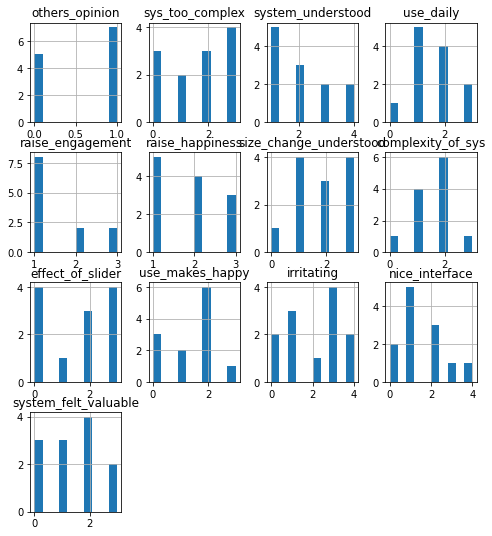

In [10]:
df_abs.hist(figsize = (8,9));

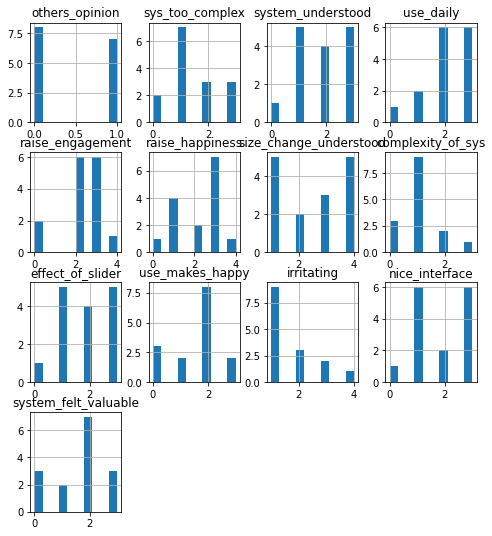

In [11]:
df_det.hist(figsize = (8,9));

From the histogram, it is clear that the data is not normally distributed.
Some normality tests can be done to prove it.
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

/home/ctw/python_envs/data_analysis/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


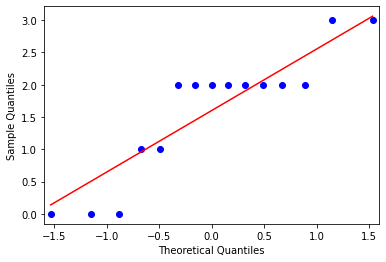

In [12]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df_det['use_makes_happy'], line='s');

# @Labi, please try it with some of the columns from abstract, 
# and detailed set and show that due to outliers data is likely not from a Gaussian distribution.

Since there are deviations in the QQ plot, the data is not drawn from a Gaussian distribution.

### Shapiro-Wilk test to know if the data was drawn from a Gaussian distribution

In [13]:
from scipy.stats import shapiro
def is_normally_distributed(data, alpha=0.05):
    stat, p = shapiro(data)
    if p > alpha:
        return True
    else:
        return False

In [14]:
for colmn in df_abs.columns:
    print(f'{colmn} is normally distributed: {is_normally_distributed(df_abs[colmn])}')

others_opinion is normally distributed: False
sys_too_complex is normally distributed: False
system_understood is normally distributed: False
use_daily is normally distributed: True
raise_engagement is normally distributed: False
raise_happiness is normally distributed: False
size_change_understood is normally distributed: True
complexity_of_sys is normally distributed: True
effect_of_slider is normally distributed: False
use_makes_happy is normally distributed: False
irritating is normally distributed: True
nice_interface is normally distributed: True
system_felt_valuable is normally distributed: True


In [15]:
for colmn in df_det.columns:
    print(f'{colmn} is normally distributed: {is_normally_distributed(df_det[colmn])}')

others_opinion is normally distributed: False
sys_too_complex is normally distributed: False
system_understood is normally distributed: False
use_daily is normally distributed: False
raise_engagement is normally distributed: False
raise_happiness is normally distributed: False
size_change_understood is normally distributed: False
complexity_of_sys is normally distributed: False
effect_of_slider is normally distributed: False
use_makes_happy is normally distributed: False
irritating is normally distributed: False
nice_interface is normally distributed: False
system_felt_valuable is normally distributed: False


Since, almost all of the data is not normally distributed, we will use non-parametric methods to check our Null hypothesis, H0: There is no difference in the data distribution of abstract emojis and detailed emojis. 

In [ ]:
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

In [21]:
# Mann-Whitney U Test
from scipy.stats import mannwhitneyu
def Mann_Whitney_U_Test(data0, data1, alpha=0.05):
    stat, p = mannwhitneyu(data0, data1)
    if p > alpha:
        return True
    else:
        return False

In [22]:
for colmn in df_abs.columns:
    print(f'{colmn} in both sets, belongs to same distribution: {Mann_Whitney_U_Test(df_abs[colmn], df_det[colmn])}')

others_opinion in both sets, belongs to same distribution: True
sys_too_complex in both sets, belongs to same distribution: True
system_understood in both sets, belongs to same distribution: True
use_daily in both sets, belongs to same distribution: True
raise_engagement in both sets, belongs to same distribution: False
raise_happiness in both sets, belongs to same distribution: True
size_change_understood in both sets, belongs to same distribution: True
complexity_of_sys in both sets, belongs to same distribution: False
effect_of_slider in both sets, belongs to same distribution: True
use_makes_happy in both sets, belongs to same distribution: True
irritating in both sets, belongs to same distribution: True
nice_interface in both sets, belongs to same distribution: True
system_felt_valuable in both sets, belongs to same distribution: True


In [23]:
# Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
def Wilcoxon_signed_rank_Test(data0, data1, alpha=0.05):
    stat, p = mannwhitneyu(data0, data1)
    if p > alpha:
        return True
    else:
        return False

In [24]:
for colmn in df_abs.columns:
    print(f'{colmn} in both sets, belongs to same distribution: {Wilcoxon_signed_rank_Test(df_abs[colmn], df_det[colmn])}')

others_opinion in both sets, belongs to same distribution: True
sys_too_complex in both sets, belongs to same distribution: True
system_understood in both sets, belongs to same distribution: True
use_daily in both sets, belongs to same distribution: True
raise_engagement in both sets, belongs to same distribution: False
raise_happiness in both sets, belongs to same distribution: True
size_change_understood in both sets, belongs to same distribution: True
complexity_of_sys in both sets, belongs to same distribution: False
effect_of_slider in both sets, belongs to same distribution: True
use_makes_happy in both sets, belongs to same distribution: True
irritating in both sets, belongs to same distribution: True
nice_interface in both sets, belongs to same distribution: True
system_felt_valuable in both sets, belongs to same distribution: True
